# **Random Forest**

**Ensemble Learning**
1. Bagging
2. Boosting

* combining multiple decision Trees
* bagging algorithm -> avoids overfitting,eg:random forest
* ensemble learning method based of decision tree
* improve accuracy and reduce overfitting

**Bagging Algorithm**

It is an ensemble machine learning technique that improves the stability and
accuracy of models by combining predictions from multiple models trained on
different subsets of the data.
* classification -> majority value
* rgression -> mean value

**Advantages**
* reduce overfitting
* high accuracy
* provides feature importance
* Works with Different
Types of Data

**Disadvantages**
* Can Be
computationally
Intensive
*: Harder to Interpret


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import seaborn as sn

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/Automobile_data.csv')
df.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


In [ ]:
df.isna().sum()

,0
index,0
company,0
body-style,0
wheel-base,0
length,0
engine-type,0
num-of-cylinders,0
horsepower,0
average-mileage,0
price,3


In [ ]:
df['price'] = df['price'].fillna((df['price'].mean()))

In [ ]:
df=df.drop(columns='index')

In [ ]:
df.isna().sum()

,0
company,0
body-style,0
wheel-base,0
length,0
engine-type,0
num-of-cylinders,0
horsepower,0
average-mileage,0
price,0


In [ ]:
df.shape

(61, 9)

In [ ]:
df.dtypes

,0
company,object
body-style,object
wheel-base,float64
length,float64
engine-type,object
num-of-cylinders,object
horsepower,int64
average-mileage,int64
price,float64


In [ ]:
df['num-of-cylinders']

,num-of-cylinders
0,four
1,four
2,six
3,four
4,five
...,...
56,four
57,four
58,four
59,four


In [ ]:
!pip install word2number

In [ ]:
from word2number import w2n

In [ ]:
df['num-of-cylinders']=df['num-of-cylinders'].apply(w2n.word_to_num)

In [ ]:
df.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,alfa-romero,convertible,88.6,168.8,dohc,4,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,4,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,6,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,4,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,5,115,18,17450.0


In [ ]:
df.dtypes

,0
company,object
body-style,object
wheel-base,float64
length,float64
engine-type,object
num-of-cylinders,int64
horsepower,int64
average-mileage,int64
price,float64


<Axes: xlabel='company', ylabel='count'>

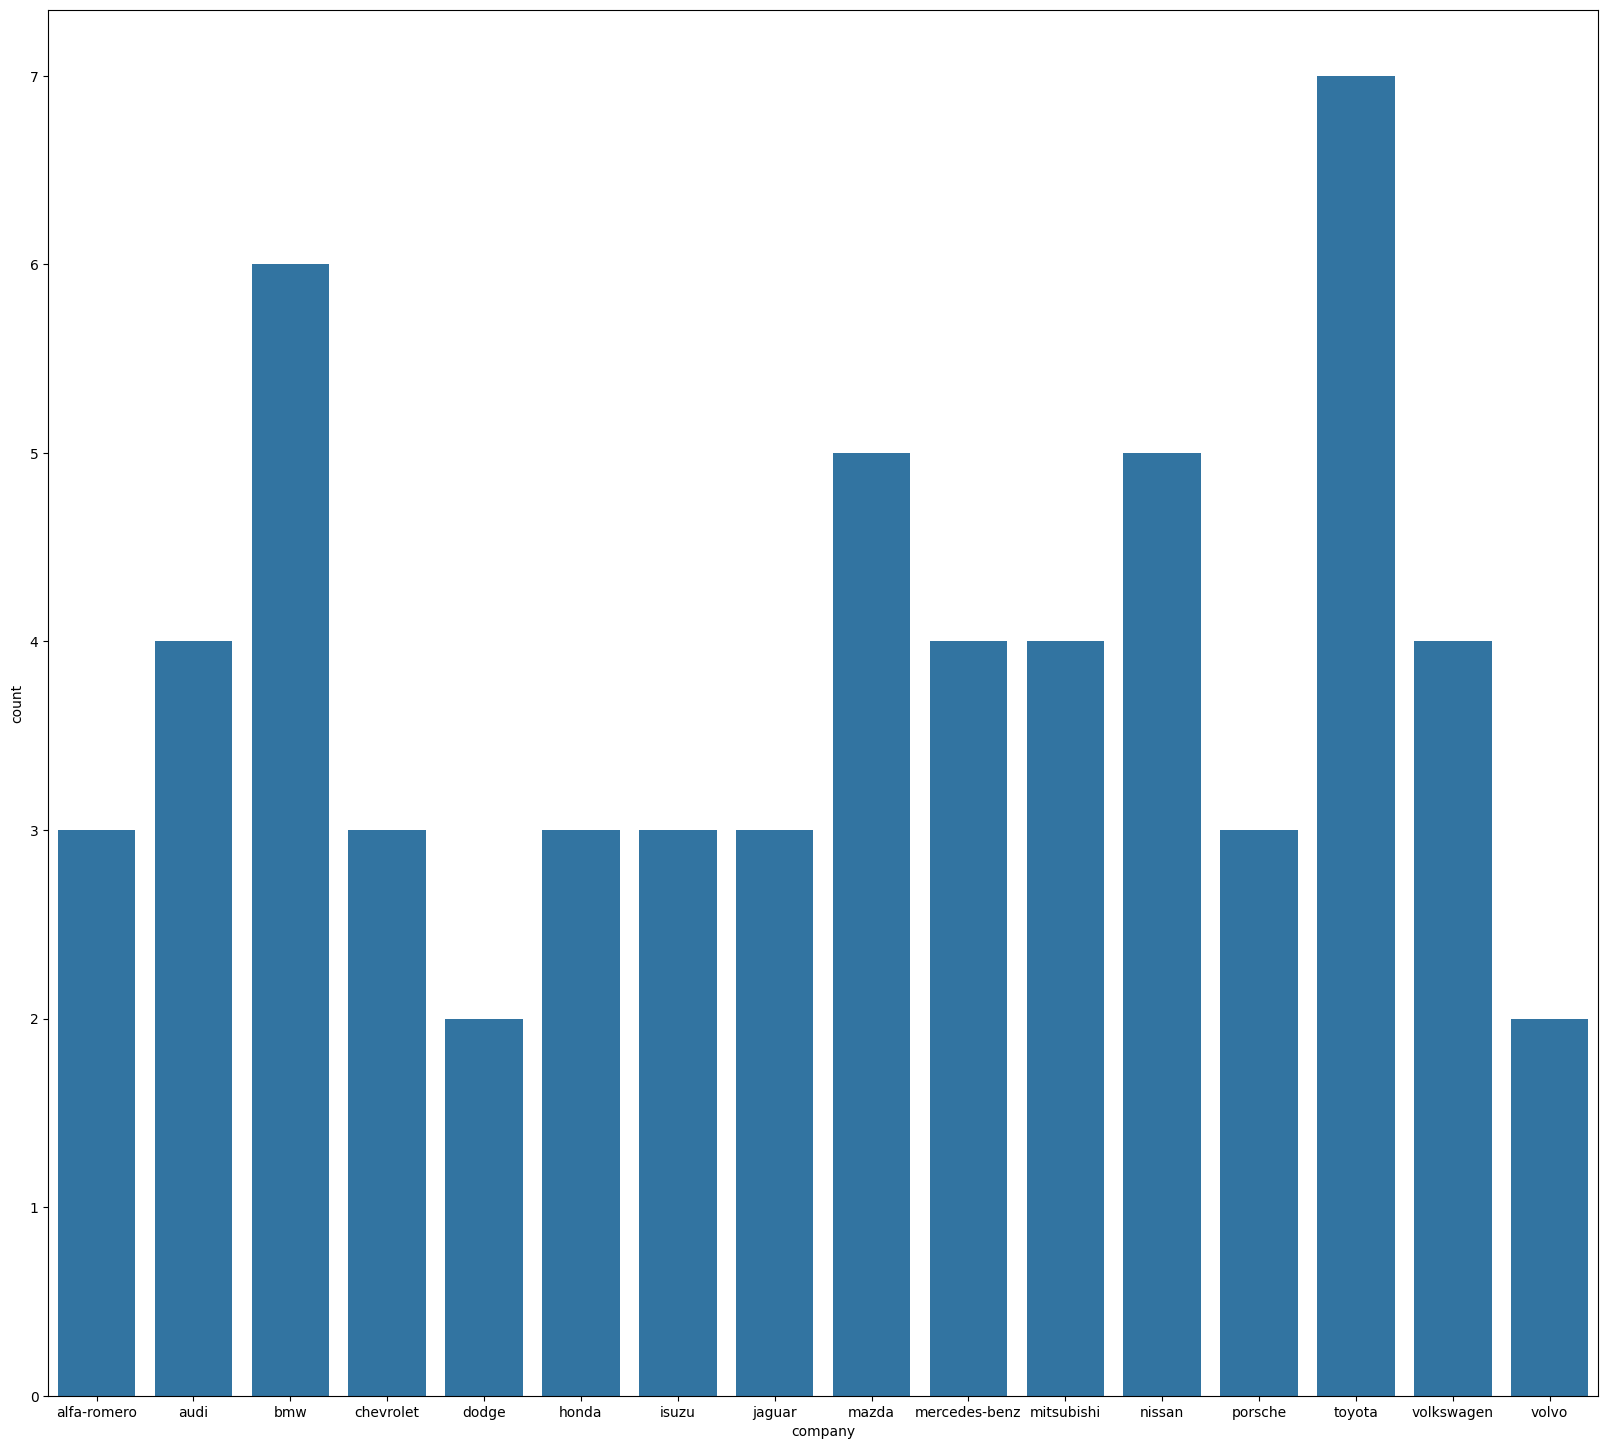

In [ ]:
plt.figure(figsize=(20,18))
sn.countplot(df,x='company')

<Axes: xlabel='body-style', ylabel='count'>

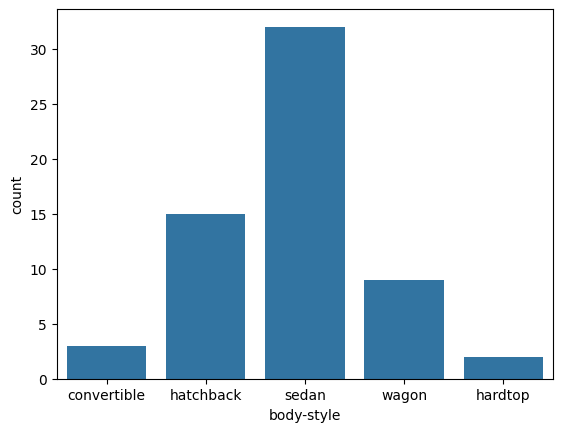

In [ ]:
sn.countplot(df,x='body-style')

<Axes: xlabel='engine-type', ylabel='count'>

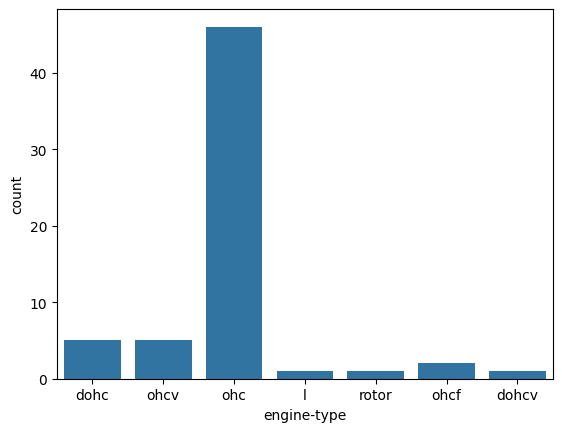

In [ ]:
sn.countplot(df,x='engine-type')

In [ ]:
label_encoder=preprocessing.LabelEncoder()
df['body-style']=label_encoder.fit_transform(df['body-style'])
df['company']=label_encoder.fit_transform(df['company'])
df['engine-type']=label_encoder.fit_transform(df['engine-type'])

In [ ]:
df.dtypes

,0
company,int64
body-style,int64
wheel-base,float64
length,float64
engine-type,int64
num-of-cylinders,int64
horsepower,int64
average-mileage,int64
price,float64


In [ ]:
x=df.drop(columns='price')
x.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage
0,0,0,88.6,168.8,0,4,111,21
1,0,0,88.6,168.8,0,4,111,21
2,0,2,94.5,171.2,5,6,154,19
3,1,3,99.8,176.6,3,4,102,24
4,1,3,99.4,176.6,3,5,115,18


In [ ]:
y=df['price']
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [ ]:
model=RandomForestRegressor()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

array([ 7878.15619048,  7359.79619048, 20440.7475    ,  6302.22285714,
        7537.46333333, 29910.015     , 39286.13      ,  5912.33      ,
        7359.79619048,  8193.15      , 36407.18      , 22259.6       ,
       27854.5675    , 16098.9       ,  6452.22333333, 16018.98      ,
       10922.848     , 31413.57      ,  7644.18      ])

In [ ]:
a=model.score(x_test,y_test)
print(f"Accuracy of the model : {np.round((a*100),2)}%")

Accuracy of the model : 91.62%


In [ ]:
df.head()
a=pd.DataFrame([[0,1,98.23,189.25,3,6,400,18]])
predict=model.predict(a)
print(f"Price will be:{predict}Rs")

Price will be:[26582.18]Rs


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# **Example 2**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing

import seaborn as sn

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
df.isna().sum()

,0
PassengerId,0
Name,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [ ]:
df.shape

(891, 12)

In [ ]:
df=df.drop(columns=['Cabin','PassengerId','Name'])
df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,3,male,22.0,1,0,A/5 21171,7.2500,S,0
1,1,female,38.0,1,0,PC 17599,71.2833,C,1
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,1,female,35.0,1,0,113803,53.1000,S,1
4,3,male,35.0,0,0,373450,8.0500,S,0


In [ ]:
df.isna().sum()

,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,2
Survived,0


In [ ]:
df['Age']=df['Age'].fillna((df['Age'].mean()))

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<Axes: xlabel='Embarked', ylabel='count'>

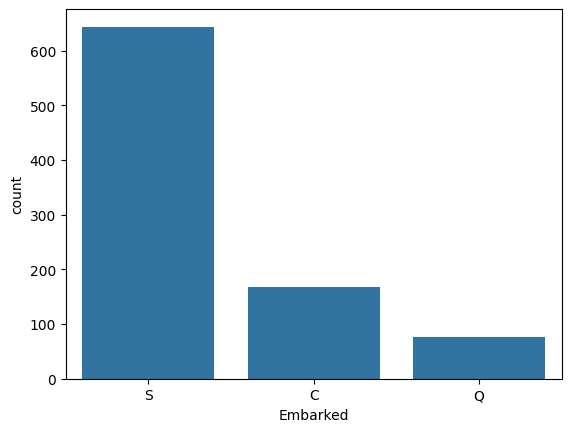

In [ ]:
sn.countplot(df,x='Embarked')

In [ ]:
df['Embarked']=df['Embarked'].fillna('S')

In [ ]:
df.isna().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0
Survived,0


In [ ]:
df.dtypes

,0
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Embarked,object
Survived,int64


In [ ]:
label_encoder=preprocessing.LabelEncoder()
df['Sex']=label_encoder.fit_transform(df['Sex'])
df['Ticket']=label_encoder.fit_transform(df['Ticket'])
df['Embarked']=label_encoder.fit_transform(df['Embarked'])

In [ ]:
df.dtypes

,0
Pclass,int64
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Ticket,int64
Fare,float64
Embarked,int64
Survived,int64


In [ ]:
x=df.drop(columns='Survived')
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,22.0,1,0,523,7.2500,2
1,1,0,38.0,1,0,596,71.2833,0
2,3,0,26.0,0,0,669,7.9250,2
3,1,0,35.0,1,0,49,53.1000,2
4,3,1,35.0,0,0,472,8.0500,2


In [ ]:
y=df['Survived']
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
model=RandomForestClassifier(n_estimators=85,random_state=35)
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0])

In [ ]:
a=model.score(x_test,y_test)
print(f"Accuracy of the model:{np.round((a*100),2)}%")

Accuracy of the model:79.48%


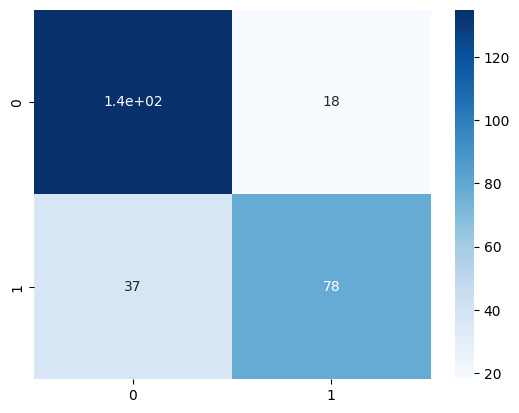

In [ ]:
cm=confusion_matrix(y_test,pred_y)
cm
sn.heatmap(cm,annot=True,cmap='Blues')
plt.show()

In [ ]:
classification_report(y_test,pred_y)

'              precision    recall  f1-score   support\n\n           0       0.78      0.88      0.83       153\n           1       0.81      0.68      0.74       115\n\n    accuracy                           0.79       268\n   macro avg       0.80      0.78      0.79       268\nweighted avg       0.80      0.79      0.79       268\n'

In [ ]:
x.head()
a=pd.DataFrame([[1,1,23,0,0,420,80.99,1]])
predict=model.predict(a)
#print(predict)
if predict==0:
  print('The passenger did not survive')
else:
  print('Passenger Survived')

The passenger did not survive


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# **Example 3**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn

from sklearn.datasets import load_digits

In [ ]:
digits=load_digits()

In [ ]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
digits.data[3]

array([ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.,  0.,  8., 13.,  6., 15.,
        4.,  0.,  0.,  0.,  2.,  1., 13., 13.,  0.,  0.,  0.,  0.,  0.,
        2., 15., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 12., 12.,  1.,
        0.,  0.,  0.,  0.,  0.,  1., 10.,  8.,  0.,  0.,  0.,  8.,  4.,
        5., 14.,  9.,  0.,  0.,  0.,  7., 13., 13.,  9.,  0.,  0.])

In [ ]:
digits.target[3]

np.int64(3)

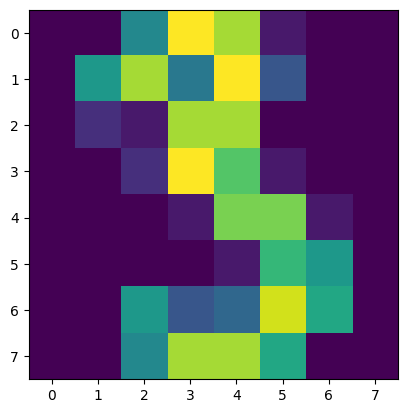

In [ ]:
plt.imshow(digits.images[3])
plt.show()

In [ ]:
df=pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
df.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
60,0
61,0
62,0
63,0


In [ ]:
df.shape

(1797, 65)

In [ ]:
df.dtypes

,0
0,float64
1,float64
2,float64
3,float64
4,float64
...,...
60,float64
61,float64
62,float64
63,float64


In [ ]:
x=df.drop(columns='target')
x.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
y=df['target']
y.head()

,target
0,0
1,1
2,2
3,3
4,4


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [ ]:
model=RandomForestClassifier(n_estimators=75,random_state=30)
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       5, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 5, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 7, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 8, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 4, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 8, 7, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 4, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 2, 0, 5,

In [ ]:
a=model.score(x_test,y_test)
print(f"Accuracy of the model : {np.round((a*100),2)}%")

Accuracy of the model : 98.15%


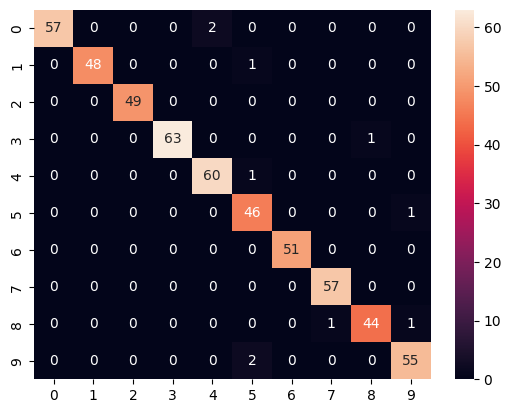

In [ ]:
cm=confusion_matrix(y_test,pred_y)
cm
sn.heatmap(cm,annot=True)
plt.show()

In [ ]:
classification_report(y_test,pred_y)

'              precision    recall  f1-score   support\n\n           0       1.00      0.97      0.98        59\n           1       1.00      0.98      0.99        49\n           2       1.00      1.00      1.00        49\n           3       1.00      0.98      0.99        64\n           4       0.97      0.98      0.98        61\n           5       0.92      0.98      0.95        47\n           6       1.00      1.00      1.00        51\n           7       0.98      1.00      0.99        57\n           8       0.98      0.96      0.97        46\n           9       0.96      0.96      0.96        57\n\n    accuracy                           0.98       540\n   macro avg       0.98      0.98      0.98       540\nweighted avg       0.98      0.98      0.98       540\n'